In [54]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform

final_data=pd.read_csv('210809자료합친파일.csv')
final_data.set_index(['국가'], inplace=True)

for col in final_data.columns:
    final_data[col] = final_data[col].apply(lambda data : data if pd.isna(data) else np.NaN if data =='-' else re.findall('[0-9.]+',str(data))[0])
final_data = final_data.astype(float)
final_data['국가명'] = final_data.index

In [62]:
final_data

,2018;국내총생산(GDP $),2019;국내총생산(GDP $),합계출산;2015,합계출산;2020,도시화율;2020,평균교육기간(년);2018,1인당 GNI(구매력환산기준 2011) (달러);2018,2020;연간 인구증가율,2020;0~14세 인구 구성비,2020;15~64세 인구 구성비,...,초등교육;합계,중등교육;남자,중등교육;여자,중등교육;합계,고등교육;남자,고등교육;여자,고등교육;합계,경제활동참여율;남자,경제활동참여율;여자,국가명
국가,,,,,,,,,,,,,,,,,,,,,
<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<<<<<<< HEAD
아프가니스탄,1.835388e+10,1.929110e+10,5.45,4.56,26.0,3.9,1.0,2.304,41.823,55.528,...,102.2,67.9,38.6,53.6,14.2,4.9,9.7,NaN,NaN,아프가니스탄
알바니아,1.514702e+10,1.528661e+10,1.71,1.62,62.1,10.1,12.0,0.578,17.236,68.060,...,107.0,95.8,94.7,95.3,45.7,69.8,57.4,64.392,46.603,알바니아
알제리,1.754150e+11,1.711578e+11,2.96,3.05,73.7,8.0,13.0,1.837,30.784,62.474,...,111.8,NaN,NaN,NaN,38.4,57.2,47.6,67.034,14.556,알제리
미국령사모아,6.410000e+08,6.380000e+08,NaN,NaN,NaN,NaN,NaN,0.208,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미국령사모아
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
유럽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,유럽
지브롤터,NaN,NaN,NaN,NaN,100.0,NaN,NaN,0.045,NaN,NaN,...,103.5,119.1,115.7,117.5,NaN,NaN,NaN,NaN,NaN,지브롤터
>>>>>>> ad3d2b692e93b294c347802c44825b96aecb0924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>>>>>>> ad3d2b692e93b294c347802c44825b96aecb0924


In [55]:
# 합계출산과 각 col의 데이터프레임 만드는 함수
def makeDataframe(col):
    data_df=final_data[[col,'합계출산;2020','국가명']]
    data_df=data_df[data_df['국가명']!='세계']
    data_df.sort_values(col, ascending=False, inplace=True)
    data_df=data_df.dropna()
    return data_df

# 합계출산과 각 col의 log scale graph 만드는 함수
def makeGraph(df,col):
    if platform.system()=="Darwin":
        rcParams['font.family']=['AppleGothic']
    elif platform.system()=="Window":
        rcParams['font.family']=['Malgun Gothic']
    rcParams['axes.unicode_minus']=False
    
    plt.rcParams['figure.figsize']=[15,10]
    
    plt.plot('합계출산;2020',
             col,
             data = df, 
             linestyle='none', 
             marker='o', 
             markersize=10,
             color='blue', 
             alpha=0.5)

    plt.title(col+'& Birth rate', fontsize=20)
    plt.xlabel('2020 birthrate', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.yscale('log')
    plt.hlines(df[col].mean(),
               df['합계출산;2020'].min(),
               df['합계출산;2020'].max(),
             color='gray',
             linestyle='--',
             linewidth = 2)
    plt.vlines(df['합계출산;2020'].mean(),
               df[col].min(),
               df[col].max(),
             color='gray',
             linestyle='--',
             linewidth = 2)
    
    return plt.show()

In [56]:
gdp_birth_gh=makeDataframe('2019;국내총생산(GDP $)')
city_birth_gh=makeDataframe('도시화율;2020')
edu_birth_gh=makeDataframe('평균교육기간(년);2018')
gni_birth_gh=makeDataframe('1인당 GNI(구매력환산기준 2011) (달러);2018')
improve_birth_gh=makeDataframe('2020;연간 인구증가율')

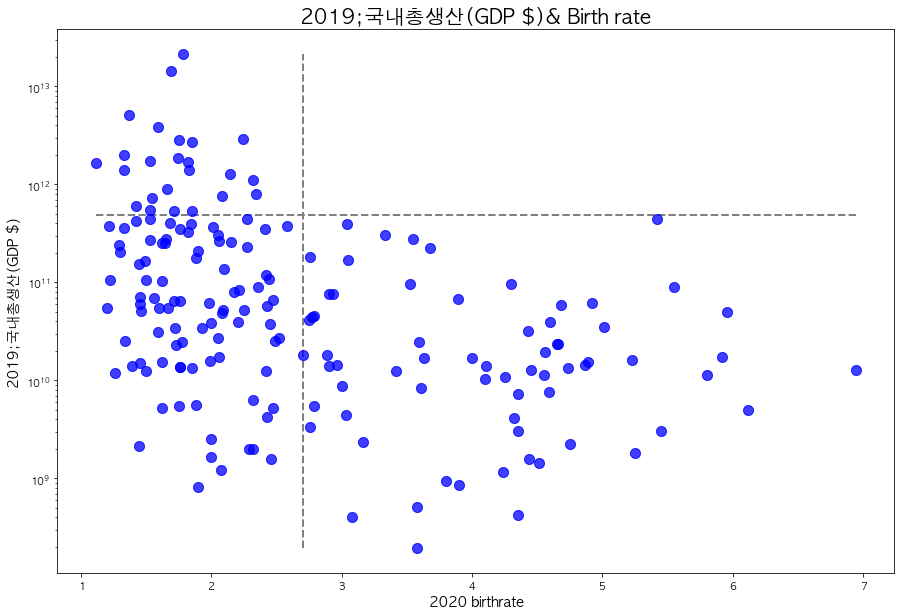

In [59]:
makeGraph(gdp_birth_gh,'2019;국내총생산(GDP $)')


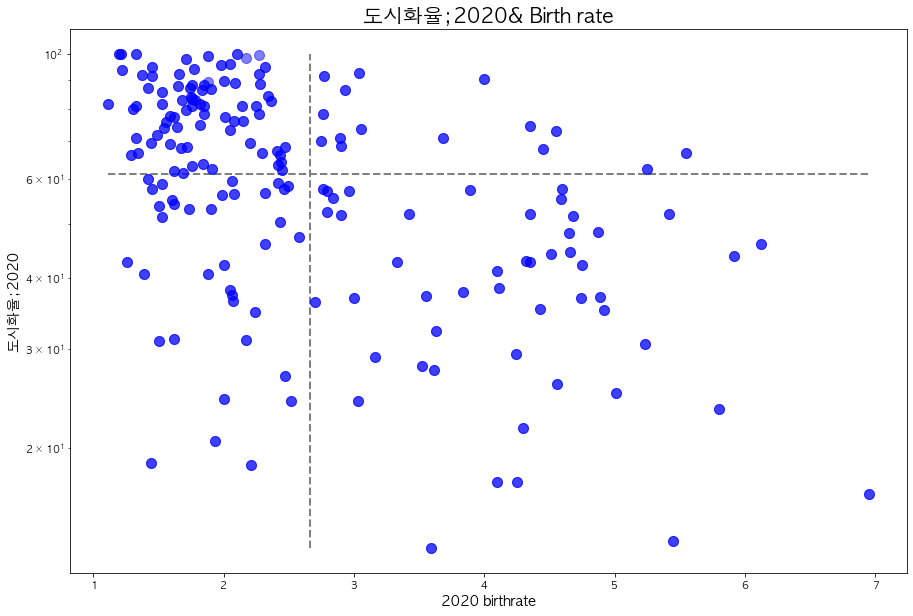

In [60]:
makeGraph(city_birth_gh,'도시화율;2020')


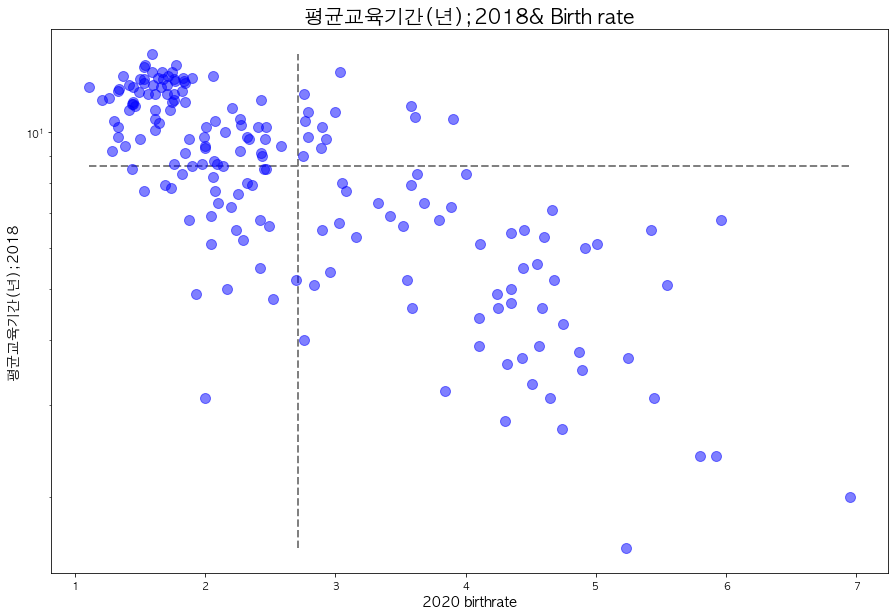

In [46]:
makeGraph(edu_birth_gh,'평균교육기간(년);2018')


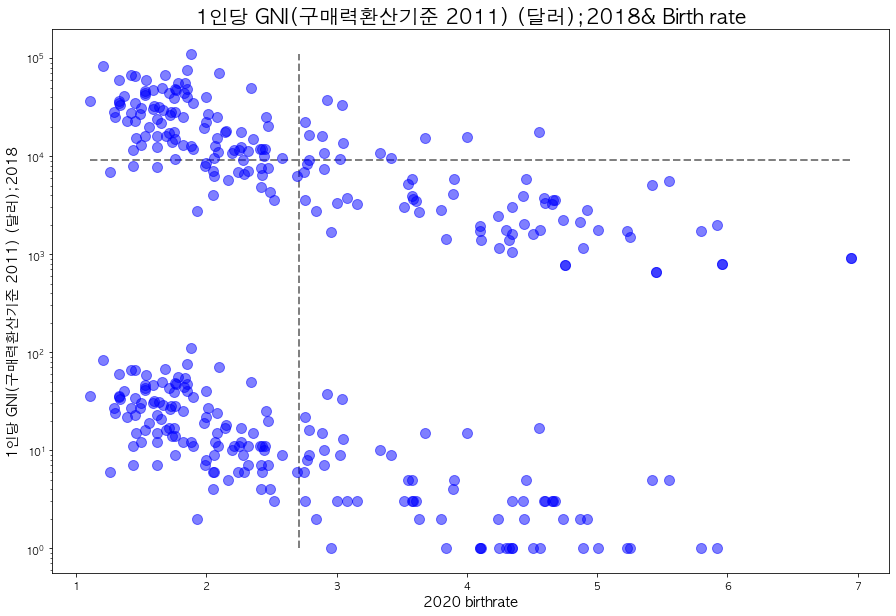

In [61]:
makeGraph(gni_birth_gh,'1인당 GNI(구매력환산기준 2011) (달러);2018')


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


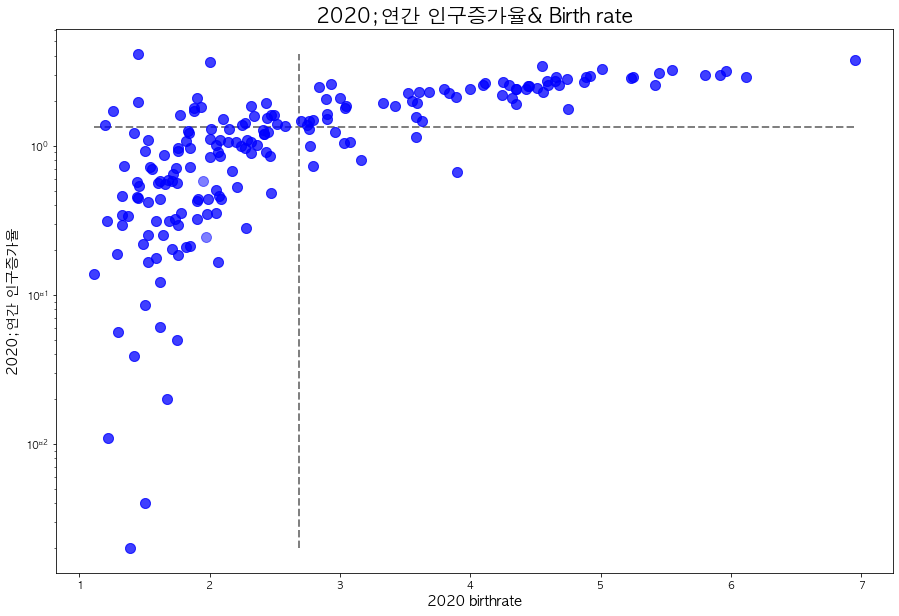

In [58]:
makeGraph(improve_birth_gh,'2020;연간 인구증가율')

In [ ]:
edu_birthrate_df=makeDataframe('평균교육기간(년);2018')

plt.rcParams['figure.figsize'] = [15, 10]

plt.plot('합계출산;2020',
         '평균교육기간(년);2018',
         data = edu_birthrate_df, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('평균교육기간 & Birth rate', fontsize=20)
plt.xlabel('2020 birthrate', fontsize=14)
plt.ylabel('2018 평균교육기간', fontsize=14)
plt.yscale('log')
plt.hlines(edu_birthrate_df['평균교육기간(년);2018'].mean(),
           edu_birthrate_df['합계출산;2020'].min(),
           edu_birthrate_df['합계출산;2020'].max(),
         color='gray',
         linestyle='--',
         linewidth = 2)
plt.vlines(edu_birthrate_df['합계출산;2020'].mean(),
           edu_birthrate_df['평균교육기간(년);2018'].min(),
           edu_birthrate_df['평균교육기간(년);2018'].max(),
         color='gray',
         linestyle='--',
         linewidth = 2)
plt.show()

In [ ]:
gni_birthrate_df=final_data[['1인당 GNI(구매력환산기준 2011) (달러);2018','합계출산;2020','국가명']]
gni_birthrate_df[(gni_birthrate_df['국가명']!='세계')&(gni_birthrate_df['국가명']!='북아메리카')]
gni_birthrate_df.sort_values('1인당 GNI(구매력환산기준 2011) (달러);2018',ascending=False,inplace=True)
gni_birthrate_df=gni_birthrate_df.dropna()

plt.rcParams['figure.figsize'] = [15, 10]

plt.plot('합계출산;2020',
         '평균교육기간(년);2018',
         data = edu_birthrate_df, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('평균교육기간 & Birth rate', fontsize=20)
plt.xlabel('2020 birthrate', fontsize=14)
plt.ylabel('2018 평균교육기간', fontsize=14)
plt.yscale('log')
plt.hlines(edu_birthrate_df['평균교육기간(년);2018'].mean(),
           edu_birthrate_df['합계출산;2020'].min(),
           edu_birthrate_df['합계출산;2020'].max(),
         color='gray',
         linestyle='--',
         linewidth = 2)
plt.vlines(edu_birthrate_df['합계출산;2020'].mean(),
           edu_birthrate_df['평균교육기간(년);2018'].min(),
           edu_birthrate_df['평균교육기간(년);2018'].max(),
         color='gray',
         linestyle='--',
         linewidth = 2)
plt.show()